# Augmentation

In [32]:
from PIL import Image
import os
from torchvision import transforms
import torch
import matplotlib.pyplot as plt
import numpy as np

In [33]:
class Dataset(torch.utils.data.Dataset):

    def __init__(self, path_data, transforms):
        self.path_data = path_data
        self.image_paths = os.listdir(self.path_data)
        self.transforms = transforms

    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        image = Image.open(os.path.join(self.path_data, self.image_paths[idx]))
        image = self.transforms(image)
        return torch.FloatTensor(image)

In [34]:
data_transforms = transforms.Compose([
    transforms.RandomResizedCrop(256),
    transforms.RandomApply(
        torch.nn.ModuleList([
            transforms.ColorJitter(brightness=0.2, contrast=0.8, saturation=0.3, hue=0.2)
        ]), p = 0.5
    ),
    transforms.RandomRotation((-30, 30)),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [35]:
train_data = Dataset('data/cats', transforms=data_transforms)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=2, shuffle=True)

In [36]:
imgs = next(iter(train_loader))

In [37]:
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.0269718].


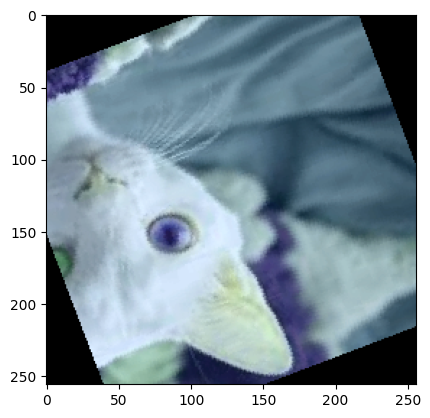

In [38]:
imshow(imgs[0])

Lets try to use albumentation

In [39]:
class Dataset(torch.utils.data.Dataset):

    def __init__(self, path_data, transforms):
        self.path_data = path_data
        self.image_paths = os.listdir(self.path_data)
        self.transforms = transforms

    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        image = Image.open(os.path.join(self.path_data, self.image_paths[idx]))
        image = self.transforms(image=np.array(image))['image']
        return torch.FloatTensor(image)


In [40]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(npimg)
    plt.show()

In [52]:
import albumentations as A

alb_transforms = A.Compose([
    A.RandomCrop(width=202, height=202), 
    A.MedianBlur(),
    A.RandomGamma(),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
])

In [53]:
train_data = Dataset('data/cats', transforms=alb_transforms)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=2, shuffle=True)

In [54]:
imgs = next(iter(train_loader))

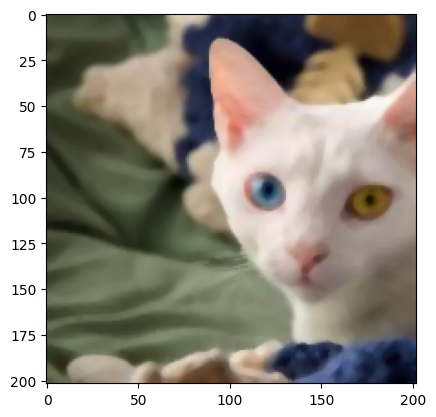

In [55]:
plt.imshow(imgs[0].numpy().astype(int))